In [38]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM



In [39]:
#Import training set
df_train=pd.read_csv('D:\\Downloads\\Google_Stock_Price_Train.csv')
training=df_train.iloc[:,1:2].values

In [40]:
#Scaling: since LSTM uses sigmoid functions, its easier to use normalisation
scaler=MinMaxScaler(feature_range=(0,1))
training_std=scaler.fit_transform(training)


In [41]:
#In this example, we want 60 timesteps with 1 output
# as discussed earlier, the RNN models do not take 3D vectors so we should convert them to 2D as follows
X_train=[]
y_train=[]
for i in range(60,len(training)):
    X_train.append(training_std[i-60:i,0])
    y_train.append(training_std[i,0])
X_train=np.array(X_train)
y_train=np.array(y_train)


X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
#The data should be converted into numpy 2D array, and then shaped to add a third dimension that represents time

In [42]:
#model
model=Sequential()

In [43]:
# in this part, we are adding the LSTM layer, where we add the number of units, activation function, input shape
# and all other parameters are set to default
#here, we added 4 memory units where activation is using sigmoid, and the input is 1 column of input
model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
#Then we add the output layer, since we want 1 colukmn of output we specify it to be 1 
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])

#After we fit the model, and we tried different values of epochs and 200 gave us the best convergence
#Default batch size is 32
model.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
38/38 [==============================] - 1s 13ms/step - loss: 0.2413 - accuracy: 0.0000e+00
Epoch 2/200
38/38 [==============================] - 0s 13ms/step - loss: 0.2313 - accuracy: 0.0000e+00
Epoch 3/200
38/38 [==============================] - 0s 13ms/step - loss: 0.2218 - accuracy: 8.3472e-04
Epoch 4/200
38/38 [==============================] - 0s 13ms/step - loss: 0.2127 - accuracy: 0.0017
Epoch 5/200
38/38 [==============================] - 0s 13ms/step - loss: 0.2034 - accuracy: 0.0017
Epoch 6/200
38/38 [==============================] - 0s 13ms/step - loss: 0.1939 - accuracy: 0.0017
Epoch 7/200
38/38 [==============================] - 0s 13ms/step - loss: 0.1837 - accuracy: 0.0017
Epoch 8/200
38/38 [==============================] - 0s 13ms/step - loss: 0.1733 - accuracy: 0.0017
Epoch 9/200
38/38 [==============================] - 1s 14ms/step - loss: 0.1616 - accuracy: 0.0017
Epoch 10/200
38/38 [==============================] - 0s 13ms/step - loss: 0.1491 - accu

In [44]:
#load data set 
test_df=pd.read_csv('D:\\Downloads\\Google_Stock_Price_Test.csv')
actual=test_df.iloc[:,1:2].values

In [45]:
#Prediction
#Here we convert the test data set and scale it the same way we did earlier with the training data set, and reshaped it
df_concatinated=pd.concat((df_train['Open'],test_df['Open']),axis=0)
inputs=df_concatinated[len(df_concatinated)-len(test_df)-60:].values
inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

#Run the prediction based on the test values, and inverse it to be able to plot it
prediction=model.predict(X_test)
prediction=scaler.inverse_transform(prediction)


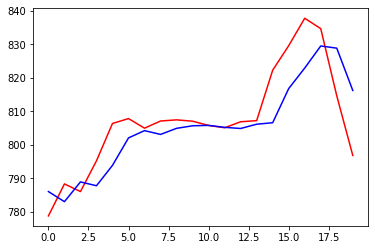

In [49]:
#Plots: Plot the actual vs predictions as follows
plt.plot(actual,c='r')
plt.plot(prediction,c='b')
plt.show()